# Disclaimer

This is a **practice notebook** that I did as a way to refresh myself with ``numpy``, ``pandas``, and ``scipy.stats``. This is in **NO WAY A VALID STUDY**. The dataset was downloaded from Kaggle and as created by [ruslankl](https://www.kaggle.com/datasets/ruslankl/european-union-lgbt-survey-2012). Methodology of the said survey is found [here](https://fra.europa.eu/sites/default/files/eu-lgbt-survey-technical-report_en.pdf). Again, this entire notebook is **NO WAY A VALID STUDY**. This was msostly done for personal practice and upskilling.

# Introduction

![Demonstrators waved rainbow and EU flags](https://ichef.bbci.co.uk/news/976/cpsprodpb/11C15/production/_89952727_89952694.jpg.webp)

The LGBTQIA+ community continues to fight for their rights across parts of the world as it affects aspects of their lives. From Healthcare to Marriage, these sectors do not cater to the community at large. An unspoken aspect of queer and trans lives that is not spoken about is Employment. Many queer and trans people face discrimination in their lives. This is not new to countries inside the European Union (EU). Hence, this data report examined the following questions:

1. Is there any legal provision providing safety against discrimination in Employment for the LGBTQIA+ community within the EU?
2. Are the responses of the respondents correlated to their subset within the LGBTQIA+ community within the EU?
3. Are the responses of the respondents correlated to their country of origin within the EU?

# Dataset and Libraries used

The main language used to analyze the data is Python. Using the libraries ``numpy``, ``pandas``, and ``matplotlib.pyplot``, the writer can get a descriptive analysis of the dataset ``LGBT_Survey_RightsAwareness.csv``. Likewise, the ``researchpy`` library and the ``scipy.stats`` library were imported to gather an inferential analysis of the dataset.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import researchpy as rp
import scipy.stats as stats

df = pd.read_csv("LGBT_Survey_RightsAwareness.csv")

df

,CountryCode,subset,question_code,question_label,answer,percentage,notes
0,Austria,Lesbian,d1,"In the country where you live, is there a law ...",Yes,53,NaN
1,Austria,Lesbian,d1,"In the country where you live, is there a law ...",No,10,NaN
2,Austria,Lesbian,d1,"In the country where you live, is there a law ...",Don`t know,37,NaN
3,Austria,Gay,d1,"In the country where you live, is there a law ...",Yes,45,NaN
4,Austria,Gay,d1,"In the country where you live, is there a law ...",No,16,NaN
...,...,...,...,...,...,...,...
3765,Average,Bisexual men,d5,"As far as you know, can same-sex couples legal...",No,35,NaN
3766,Average,Bisexual men,d5,"As far as you know, can same-sex couples legal...",Don`t know,4,NaN
3767,Average,Transgender,d5,"As far as you know, can same-sex couples legal...",Yes,62,NaN
3768,Average,Transgender,d5,"As far as you know, can same-sex couples legal...",No,35,NaN


# Survey Questionnaire

The following is the complete questionnaire sent to the respondents. 

In [3]:
questions = df.loc[:, 'question_label']
q_uni = questions.unique()

print(q_uni)

['In the country where you live, is there a law that forbids discrimination against persons because of their sexual orientation when applying for a job?'
 'In the country where you live, is there a law that forbids discrimination against persons because of their gender identity when applying for a job?'
 'Do you know of any organisation in the country where you live that can offer support or advice to people who have been discriminated against because they are Lesbian?'
 'Do you know of any organisation in the country where you live that can offer support or advice to people who have been discriminated against because they are Gay?'
 'Do you know of any organisation in the country where you live that can offer support or advice to people who have been discriminated against because they are Bisexual?'
 'Do you know of any organisation in the country where you live that can offer support or advice to people who have been discriminated against because they are Transgender?'
 'In the count

For brevity of this report, the writer has only focused on the first two questions (tagged as `d1` and `d2` in the dataset).

# Demographic of the Sample

The following are the total respondents based on their subsets within the LGBTQIA+ community.

Lesbian           87
Gay               87
Bisexual women    87
Bisexual men      87
Transgender       87
Name: subset, dtype: int64


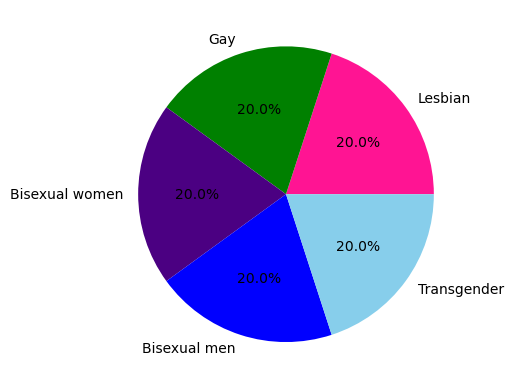

In [5]:
comm_df = df.loc[df['question_code'] == 'd1']
comm_x = comm_df.loc[:,'subset'].unique()
comm_y = comm_df.loc[:,'subset'].value_counts()
comm_colors = ["deeppink","g","indigo","blue","skyblue"]

def comm_pie():
    plt.pie(comm_y, labels=comm_x, autopct='%1.1f%%', colors=comm_colors)

print(comm_y)
comm_pie()

The following are the countries of origin of the respondents.

Austria           15
Italy             15
United Kingdom    15
Slovakia          15
Slovenia          15
Sweden            15
Romania           15
Portugal          15
Poland            15
Netherlands       15
Malta             15
Latvia            15
Luxembourg        15
Lithuania         15
Ireland           15
Belgium           15
Hungary           15
Croatia           15
France            15
Finland           15
Spain             15
Greece            15
Estonia           15
Denmark           15
Germany           15
Czech Republic    15
Cyprus            15
Bulgaria          15
Average           15
Name: CountryCode, dtype: int64


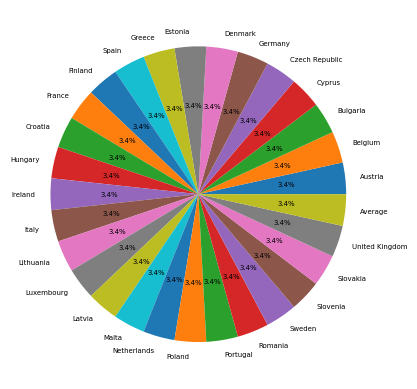

In [26]:
country_df = df.loc[df['question_code'] == 'd1']
country_x = country_df.loc[:,'CountryCode'].unique()
country_y = country_df.loc[:,'CountryCode'].value_counts()

def country_pie():
    plt.pie(country_y, labels=country_x, autopct='%1.1f%%', textprops={'fontsize': 5})

print(country_y)
country_pie()

# On Workplace Discrimination

When asked about laws that forbids discrimination against persons because of their sexual orientation when applying for a job, this is the response of the respondents:

No            55
Don`t know    19
Yes           18
Name: answer, dtype: int64


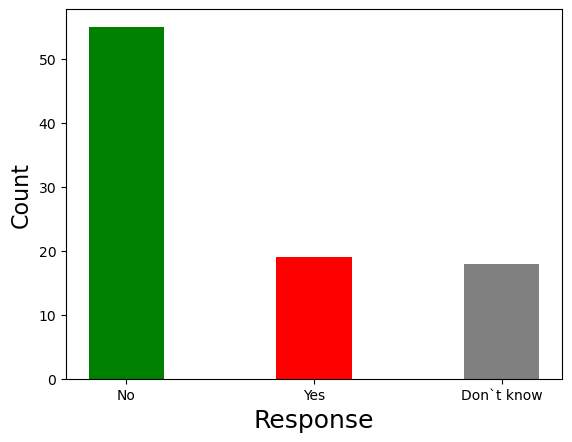

In [6]:
job_disc_2 = df.loc[df['question_code'] == 'd1'].dropna()
job_disc_a2 = job_disc_2.loc[:,'answer'].value_counts()
job_disc_l2 = job_disc_2.loc[:,'answer'].unique()
colors = ["Green", "Red", "Grey"]

def job_disc1() :
    plt.bar(job_disc_l2, job_disc_a2, color=colors, width=0.4)
    plt.xlabel("Response", fontsize=18)
    plt.ylabel("Count", fontsize=16)
    plt.show()
    
print(job_disc_a2)
job_disc1()

When asked about laws that forbids discrimination against persons because of their gender identity when applying for a job, this is the response of the respondents:

No            55
Don`t know    19
Yes           18
Name: answer, dtype: int64


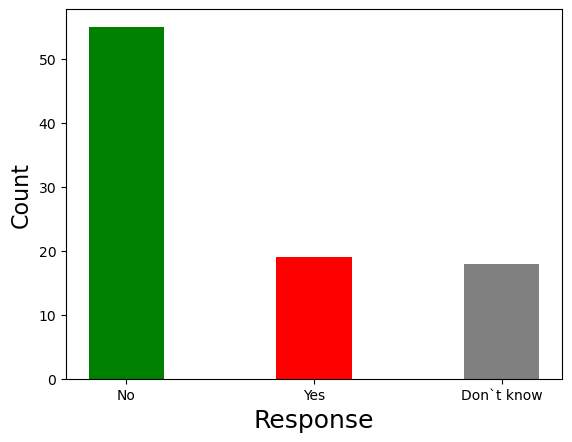

In [7]:
job_disc_3 = df.loc[df['question_code'] == 'd2'].dropna()
job_disc_a3 = job_disc_2.loc[:,'answer'].value_counts()
job_disc_l3 = job_disc_2.loc[:,'answer'].unique()
colors = ["Green", "Red", "Grey"]

def job_disc2() :
    plt.bar(job_disc_l3, job_disc_a3, color=colors, width=0.4)
    plt.xlabel("Response", fontsize=18)
    plt.ylabel("Count", fontsize=16)
    plt.show()
    
print(job_disc_a3)
job_disc2()

# Correlation with Subset within LGBTQIA+ Community

After performing a cross-tabulation of the ``subset`` with the ``answer`` column of the dataframe (filtered only to answers under the question code `d1`), the writer has performed a Chi-Square test of Independence.

**Hypotheses**
<br>
$H_{0}$ = There is no correlation between the perception of the respondents regarding laws protecting discrimination against their sexual orientation and their subset within the LGBTQIA+ community.
<br>
$H_{a}$ = There is a correlation between the perception of the respondents regarding laws protecting discrimination against their sexual orientation and their subset within the LGBTQIA+ community.
<br>
$p-value = 0.05$

In [8]:
d1_df = df.loc[df['question_code'] == 'd1'].dropna()
ctab1 = pd.crosstab(d1_df.subset, d1_df.answer)
ctab1_cs = stats.chi2_contingency(ctab1)

print(ctab1)
print(" ")
print(ctab1_cs)

answer          Don`t know  No  Yes
subset                             
Bisexual men             8  18    6
Bisexual women           3  16    3
Lesbian                  1   6    2
Transgender              7  15    7
 
Chi2ContingencyResult(statistic=3.2028929878817136, pvalue=0.7829846084478523, dof=6, expected_freq=array([[ 6.60869565, 19.13043478,  6.26086957],
       [ 4.54347826, 13.15217391,  4.30434783],
       [ 1.85869565,  5.38043478,  1.76086957],
       [ 5.98913043, 17.33695652,  5.67391304]]))


As findings show that the responses in `d1` have a $p-value$ of $0.78$, the null hypothesis is not rejected. Therefore, there is no correlation between the perception of the respondents regarding laws protecting discrimination against their sexual orientation and their subset withing the LGBTQIA+ community.

We then performed a cross-tabulation of the ``subset`` with the ``answer`` column of the dataframe filtered only to answers under the question code `d2` and performed the same procedures.

**Hypotheses**
<br>
$H_{0}$ = There is no correlation between the perception of the respondents regarding laws protecting discrimination against their gender identity and their subset within the LGBTQIA+ community.
<br>
$H_{a}$ = There is a correlation between the perception of the respondents regarding laws protecting discrimination against their gender identity and their subset within the LGBTQIA+ community.
<br>
$p-value = 0.05$

In [9]:
d2_df = df.loc[df['question_code'] == 'd2'].dropna()
ctab2 = pd.crosstab(d2_df.subset, d2_df.answer)
ctab2_cs = stats.chi2_contingency(ctab1)

print(ctab2)
print(" ")
print(ctab2_cs)

answer          Don`t know  No  Yes
subset                             
Bisexual men             6  17    6
Bisexual women           3  14    4
Lesbian                  1   3    2
Transgender              7   7    7
 
Chi2ContingencyResult(statistic=3.2028929878817136, pvalue=0.7829846084478523, dof=6, expected_freq=array([[ 6.60869565, 19.13043478,  6.26086957],
       [ 4.54347826, 13.15217391,  4.30434783],
       [ 1.85869565,  5.38043478,  1.76086957],
       [ 5.98913043, 17.33695652,  5.67391304]]))


As findings show that the responses in `d2` have a $p-value$ of $0.78$, the null hypothesis is thus not rejected. Therefore, there is a correlation between the perception of the respondents regarding laws protecting discrimination against their gender identity and their subset withing the LGBTQIA+ community.

# Correlation with Country of Origin

After performing a cross-tabulation of the ``CountryCode`` with the ``answer`` column of the dataframe (filtered only to answers under the question code `d1`), the writer has performed a Chi-Square test of Independence.

**Hypotheses**
<br>
$H_{0}$ = There is no correlation between the perception of the respondents regarding laws protecting discrimination against their sexual orientation and their country of origin.
<br>
$H_{a}$ = There is a correlation between the perception of the respondents regarding laws protecting discrimination against their sexual orientation and their country of origin.
<br>
$p-value = 0.05$

In [10]:
d1_df = df.loc[df['question_code'] == 'd1'].dropna()
ctab1a = pd.crosstab(d1_df.CountryCode, d1_df.answer)
ctab1a_cs = stats.chi2_contingency(ctab1a)

print(ctab1a)
print(" ")
print(ctab1a_cs)

answer          Don`t know  No  Yes
CountryCode                        
Belgium                  0   4    0
Bulgaria                 0   1    0
Croatia                  0   2    0
Cyprus                   4   4    4
Czech Republic           0   3    0
Denmark                  1   3    0
Estonia                  2   3    2
Finland                  0   3    0
Ireland                  1   3    0
Latvia                   2   3    2
Lithuania                1   3    1
Luxembourg               3   4    4
Malta                    3   3    3
Netherlands              0   3    0
Portugal                 0   1    0
Romania                  0   1    0
Slovakia                 0   2    0
Slovenia                 2   4    2
Sweden                   0   4    0
United Kingdom           0   1    0
 
Chi2ContingencyResult(statistic=29.72285102103284, pvalue=0.8291200485430188, dof=38, expected_freq=array([[0.82608696, 2.39130435, 0.7826087 ],
       [0.20652174, 0.59782609, 0.19565217],
       [0.413043

As findings show that the responses in `d1` have a $p-value$ of $0.82$, the null hypothesis is thus not rejected. Therefore, there is a correlation between the perception of the respondents regarding laws protecting discrimination against their sexual orientation and their country of origin.

We then performed a cross-tabulation of the ``CountryCode`` with the ``answer`` column of the dataframe filtered only to answers under the question code `d2` and performed the same procedures.

**Hypotheses**
<br>
$H_{0}$ = There is no correlation between the perception of the respondents regarding laws protecting discrimination against their gender identity and their country of origin.
<br>
$H_{a}$ = There is a correlation between the perception of the respondents regarding laws protecting discrimination against their gender identity and their country of origin.
<br>
$p-value = 0.05$

In [11]:
d2_df = df.loc[df['question_code'] == 'd2'].dropna()
ctab2a = pd.crosstab(d2_df.CountryCode, d2_df.answer)
ctab2a_cs = stats.chi2_contingency(ctab2a)

print(ctab2a)
print(" ")
print(ctab2a_cs)

answer          Don`t know  No  Yes
CountryCode                        
Austria                  0   1    0
Belgium                  0   3    0
Bulgaria                 0   1    0
Croatia                  0   2    0
Cyprus                   4   4    4
Denmark                  0   2    0
Estonia                  2   3    2
Finland                  0   1    0
Ireland                  0   1    0
Latvia                   2   3    2
Lithuania                1   3    1
Luxembourg               3   4    4
Malta                    3   3    3
Netherlands              0   1    0
Romania                  0   1    1
Slovakia                 0   2    0
Slovenia                 2   3    2
Sweden                   0   2    0
United Kingdom           0   1    0
 
Chi2ContingencyResult(statistic=21.68425079916434, pvalue=0.9713975834877007, dof=36, expected_freq=array([[0.22077922, 0.53246753, 0.24675325],
       [0.66233766, 1.5974026 , 0.74025974],
       [0.22077922, 0.53246753, 0.24675325],
       

As findings show that the responses in `d2` have a $p-value$ of $0.97$, the null hypothesis is thus rejected. Therefore, there is a correlation between the perception of the respondents regarding laws protecting discrimination against their gender identity and their country of origin.

# Conclusion

Selected LGBTQIA+ residents within the EU have expressed that there is a lack of legal protection for them when it comes to the workplace discrimination. However, these perceptions were not influenced depending on their subset within the LGBTQIA+ community and their country of origin.